# Histograms & Normal Distributions

## Histograms

You can make a histogram as an array of bin counts in numpy with np.histogram and np.histogram2d, but usually you just want to display your data in a histogram with matplotlib:

In [27]:
%matplotlib inline

import matplotlib
import numpy as np
import scipy
import matplotlib.pyplot as plt
from compare_results import compare_results
from chi2fit import linear_fit

(array([102., 105.,  98.,  81.,  97., 100., 109.,  94., 116.,  98.]),
 array([1.35568190e-04, 1.00061573e-01, 1.99987579e-01, 2.99913584e-01,
        3.99839589e-01, 4.99765595e-01, 5.99691600e-01, 6.99617605e-01,
        7.99543610e-01, 8.99469616e-01, 9.99395621e-01]),
 <a list of 10 Patch objects>)

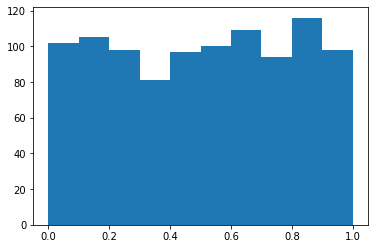

In [3]:
x = np.random.rand(1000) # rand is a uniform random distribution between 0 and 1
plt.hist(x)
plt.xlabel("random distances [m]")
plt.ylabel("N / 0.1 m")

A good generic label for the y-axis of a histogram is "Counts per bin", but if you know the bin width it's better to say "Counts / 0.1 m". To make that easier, and since matplotlib doesn't always choose a useful number of bins, you can set the range and number of bins in the hist function as shown below. The bin width is then:

binWidth = (upperBound-lowerBound)/Nbins

Text(0, 0.5, 'N / 0.1 eV')

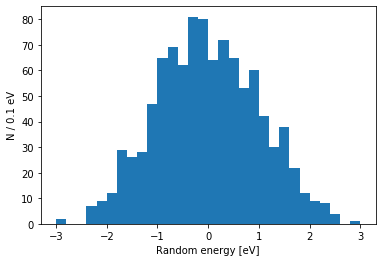

In [13]:
x = np.random.randn(1000) # randn is a normal distribution with mean 0 and std 1
plt.hist(x,bins=30,range=[-3,3])
plt.xlabel("Random energy [eV]")
plt.ylabel("N / 0.1 eV")

Below are some examples of too narrow and wide binning for this same data:

Text(0, 0.5, 'N / 1 eV')

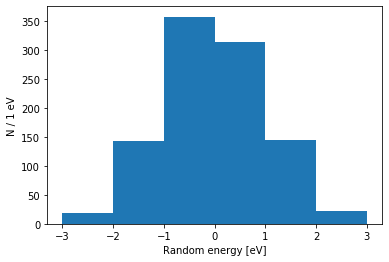

In [16]:
plt.hist(x,bins=6,range=[-3,3])
plt.xlabel("Random energy [eV]")
plt.ylabel("N / 1 eV")

Text(0, 0.5, 'N / 0.01 eV')

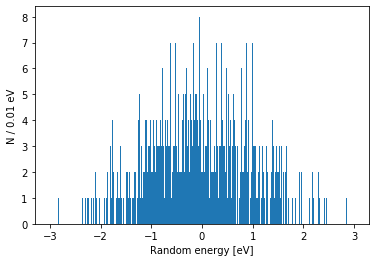

In [17]:
plt.hist(x,bins=600,range=[-3,3])
plt.xlabel("Random energy [eV]")
plt.ylabel("N / 0.01 eV")

Unfilled histograms are more useful when you want to compare two histograms:

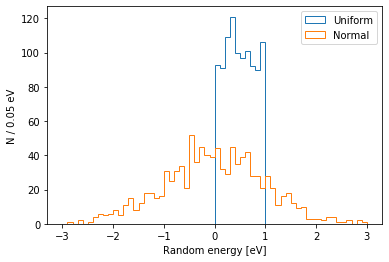

In [25]:
x1 = np.random.randn(1000)
x2 = np.random.rand(1000)
plt.hist(x2,bins=60,range=[-3,3],histtype="step",label="Uniform")
plt.hist(x1,bins=60,range=[-3,3],histtype="step",label="Normal")
plt.xlabel("Random energy [eV]")
plt.ylabel("N / 0.05 eV")
plt.legend()

You can also plot functions and PDFs on top of histograms. I had to import scipy up at the top of the file to get the PDF. Notice you have to take the normalized to 1 PDF and multiply it by the number of samples and bin width.

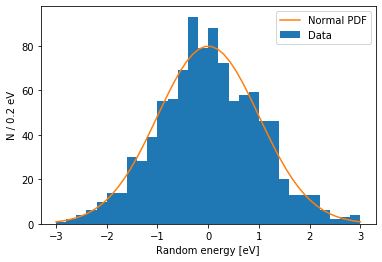

In [35]:
x = np.random.randn(1000) # randn is a normal distribution with mean 0 and std 1
xvar = np.linspace(-3,3)
pdfVals = scipy.stats.norm.pdf(xvar)*1000*0.2
plt.hist(x,bins=30,range=[-3,3],label="Data")
plt.plot(xvar,pdfVals,label="Normal PDF")
plt.xlabel("Random energy [eV]")
plt.ylabel("N / 0.2 eV")
plt.legend()

## Normal Distribution

You can get the probabilities listed in the back of your book from scipy. Notice that I imported scipy at the top of this file. 

I call a standardized discrepency, the Z-score:

Z = (x_best - x_expected)/sigma_x

Your book calls that with an absolute value t. You can get the probability for a Z-score as unlikely or worse as 1 - the probabilities in the back of your book in Appendix A or directly using scipy as 2 times the "survival function":

In [44]:
Z = 1
print("",2*scipy.stats.norm.sf(abs(Z)))

0.31731050786291415

That should match appendix A for 1 minus the value you find for t=1.

The survival function is just the last equation and graph on page 288.